In [19]:
! git clone https://github.com/vicely07/COVID19-image-classification.git

fatal: destination path 'COVID19-image-classification' already exists and is not an empty directory.


In [20]:
from google.colab import files
uploaded = files.upload()

Saving sample_images.zip to sample_images (2).zip


In [21]:
!unzip *.zip

Archive:  sample_images (1).zip
caution: filename not matched:  sample_images (2).zip
caution: filename not matched:  sample_images.zip


In [22]:
from glob import glob

test_dir = glob('/content/*.zip')[0].split(".")[0]
test_dir

'/content/sample_images'

In [23]:
from keras.models import load_model
import sys
import os
from keras.models import model_from_json
import numpy as np
from tensorflow.python.keras.models import Sequential



json_file = open('/content/COVID19-image-classification/Best_weights/covid19_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)

model = load_model('/content/COVID19-image-classification/Best_weights/Covid_Multi.h5')

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:350: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [0]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.python.keras.applications.vgg16 import preprocess_input, decode_predictions
from glob import glob
import matplotlib.pyplot as plt
import numpy as np


def predict_and_plot(img_path, i):
    #normal_or_pneumonia = ['NORMAL', 'PNEUMONIA']
    #folder_choice = (random.choice(normal_or_pneumonia))
    
    images_files = glob(img_path+'/*')
    img_choice = images_files[i]
    img = load_img(img_choice, target_size=(150, 150))
    img = img_to_array(img)

    x = preprocess_input(np.expand_dims(img.copy(), axis=0))/255.
    pred_class = model.predict_classes(x)
    pred = model.predict(x)
    likelihood = str(round(max(pred[0])*100, 2))+"%"

    if pred_class[0] == 0:
        label = "COVID"
    
    elif pred_class[0] == 1:
       label = "NORMAL"

    else:
        label = "BAC_PNEUMONIA"

    return images_files, img, label, likelihood, img_choice

In [0]:
import os
import pandas as pd

list_files = os.listdir(test_dir) # dir is your directory path
nfiles = len(list_files)
file_list = []
likelihood_list = []
pred_list = []

for i in range(nfiles):
  path, img, label, likelihood, file_name = predict_and_plot(test_dir , i)
  pred_list.append(label)
  likelihood_list.append(likelihood)
  file_list.append(file_name)

results=pd.DataFrame({"Filename":file_list,
                      "Predictions":pred_list,
                      "Likelihood": likelihood_list})
results["Filename"] = results["Filename"].apply(lambda x: str(x).split("/")[3])
results["Predictions"] = results["Predictions"].apply(lambda x: str(x).upper())

results
results.to_csv("/content/COVID19-image-classification/Output_Image/Output_pred.csv")

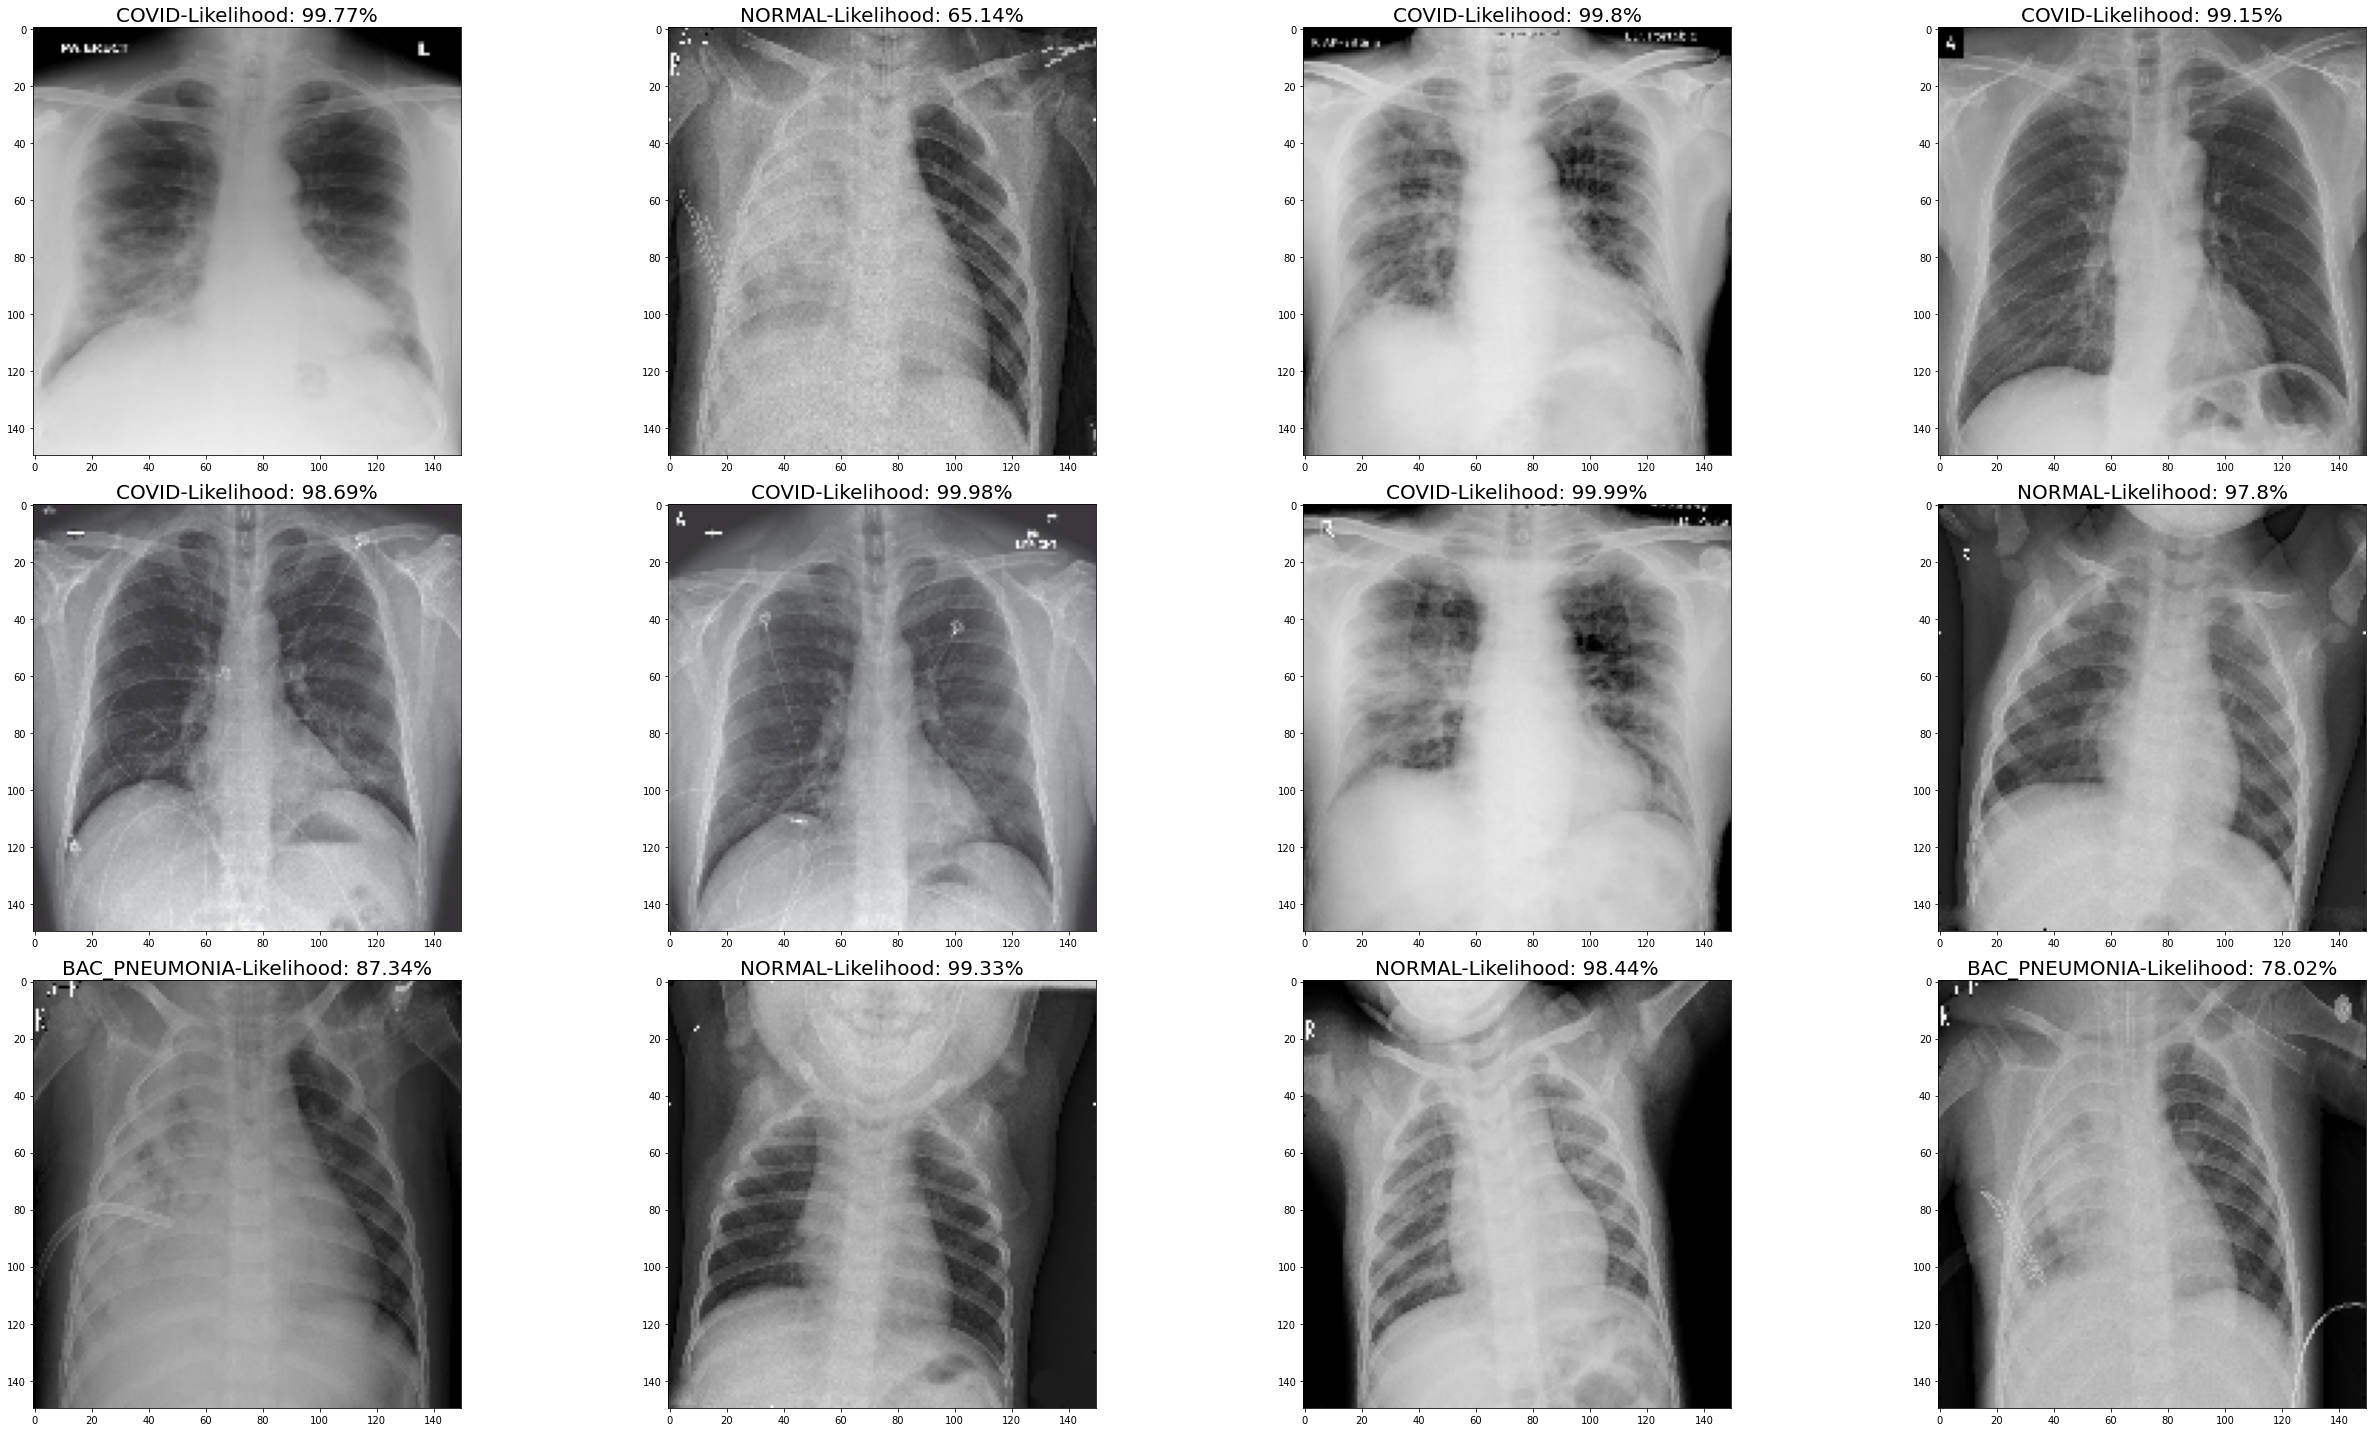

In [26]:
import matplotlib.pyplot as plt
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

files = results["Filename"]
predictions = results["Predictions"]
acc = results["Likelihood"] 
f, ax = plt.subplots(3, 4, figsize=(40, 20))
for i in range(len(path)):
  img_path = path[i]
  img = load_img(img_path, target_size=(150, 150))
  file_name = files[i]
  ax.ravel()[i].imshow(img, cmap='gray')
  ax.ravel()[i].set_title(predictions[i]+"-Likelihood: "+acc[i], fontsize=20)
  plt.tight_layout()
#plt.savefig('/content/COVID19-image-classification/Output_Image/test_batch_2.png')

In [27]:
len(path)

12